Managing Ecological Tipping Points using Deep-RL

In [1]:
import numpy as np
import stable_baselines3 as sb3
import gym
import gym_conservation
from sb3_contrib import ARS
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

In [2]:
algo = "ARS"
env_id = "conservation-v6"
team = "team_cboettig"
agent_id = env_id + "-" + algo + "-" + team
agent_id

'conservation-v6-ARS-team_cboettig'

In [3]:
seed = 24
np.random.seed(seed)

In [4]:
env = gym.make(env_id)

In [5]:

model = ARS("MlpPolicy", env = env, verbose=0, tensorboard_log="/var/log/tensorboard/")

In [6]:
if not os.path.exists((agent_id+".zip")):
    model.learn(total_timesteps=3000000)
    model.save(agent_id)

In [7]:
model = ARS.load(agent_id)

score = evaluate_policy(model, Monitor(env), n_eval_episodes=10)
score

(168.1663061, 4.019903673866384)

In [8]:

sims = env.simulate(model, reps=100)
policy = env.policyfn(model, reps=10)
sims


,time,state,action,reward,rep
0,0,0.800000,0.000000,0.000000,0
1,1,0.891106,0.378082,0.328263,0
2,2,0.742554,0.339692,0.310739,0
3,3,0.909018,0.404761,0.312339,0
4,4,0.970980,0.332625,0.381999,0
...,...,...,...,...,...
49995,495,0.621092,0.445262,0.184874,99
49996,496,0.745266,0.465502,0.210329,99
49997,497,0.737441,0.403465,0.261657,99
49998,498,0.954803,0.407215,0.322615,99


<AxesSubplot:xlabel='time', ylabel='state'>

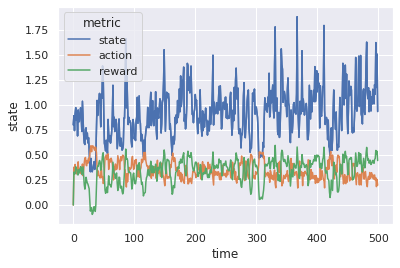

In [19]:
import seaborn as sns
sns.set_theme(style="darkgrid")

rep0 = sims.query("rep==0")
sns.lineplot(x="time", y="state",data=rep0)

df = rep0.melt(id_vars=['time','rep'],var_name='metric', value_name='values')
sns.lineplot( x="time", y="values", hue="metric", data = df)



<AxesSubplot:xlabel='state', ylabel='action'>

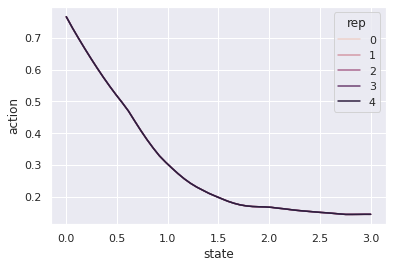

In [17]:
df = policy.query("rep < 5")
sns.lineplot(data = df, x="state", y="action", hue = "rep")


In [ ]:
import torch
#del model
torch.cuda.empty_cache()
